<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-7-:--Implémentez-un-modèle-de-scoring:-Analyse-exploratoire" data-toc-modified-id="Projet-7-:--Implémentez-un-modèle-de-scoring:-Analyse-exploratoire-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Projet 7 :  Implémentez un modèle de scoring: Analyse exploratoire</a></span><ul class="toc-item"><li><span><a href="#Analyse-Multivariée" data-toc-modified-id="Analyse-Multivariée-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Analyse Multivariée</a></span><ul class="toc-item"><li><span><a href="#Analyse-Univariée" data-toc-modified-id="Analyse-Univariée-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Analyse Univariée</a></span><ul class="toc-item"><li><span><a href="#Histogrammes-et-boîtes-à-moustaches" data-toc-modified-id="Histogrammes-et-boîtes-à-moustaches-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Histogrammes et boîtes à moustaches</a></span></li><li><span><a href="#Répartition-des-Nutriscores" data-toc-modified-id="Répartition-des-Nutriscores-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Répartition des Nutriscores</a></span></li></ul></li></ul></li><li><span><a href="#Analyse-bivariée" data-toc-modified-id="Analyse-bivariée-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analyse bivariée</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Pairplot-pour-les-données-quantitatives" data-toc-modified-id="Pairplot-pour-les-données-quantitatives-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Pairplot pour les données quantitatives</a></span></li><li><span><a href="#Distributions-de-nutriments-par-grade-nutritionnel" data-toc-modified-id="Distributions-de-nutriments-par-grade-nutritionnel-1.2.0.2"><span class="toc-item-num">1.2.0.2&nbsp;&nbsp;</span>Distributions de nutriments par grade nutritionnel</a></span></li><li><span><a href="#Matrice-de-corrélation" data-toc-modified-id="Matrice-de-corrélation-1.2.0.3"><span class="toc-item-num">1.2.0.3&nbsp;&nbsp;</span>Matrice de corrélation</a></span></li><li><span><a href="#Réduction-de-dimensions-par-PCA" data-toc-modified-id="Réduction-de-dimensions-par-PCA-1.2.0.4"><span class="toc-item-num">1.2.0.4&nbsp;&nbsp;</span>Réduction de dimensions par PCA</a></span></li></ul></li></ul></li><li><span><a href="#Modélisation" data-toc-modified-id="Modélisation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Modélisation</a></span><ul class="toc-item"><li><span><a href="#Prédiction-des-valeurs-manquantes-du-Nutriscore-par-régression-linéaire" data-toc-modified-id="Prédiction-des-valeurs-manquantes-du-Nutriscore-par-régression-linéaire-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Prédiction des valeurs manquantes du Nutriscore par régression linéaire</a></span></li></ul></li></ul></li></ul></div>

# Projet 7 :  Implémentez un modèle de scoring: Analyse exploratoire

In [120]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot, transforms
import seaborn as sns
import numpy as np
import re
from matplotlib.patches import Polygon
import IPython.display
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import math
sns.set()

In [27]:
filepath = '/Users/admin/Desktop/formation_data_Scientist/projet_3/données/A/cleaned_data1.csv'

In [28]:
df = pd.read_csv(filepath)

In [74]:
cols = df.columns.drop('additives_n','ingredients_that_may_be_from_palm_oil_n')

In [75]:
df['nutrition-score-fr_100g'] = df['nutrition-score-fr_100g'].astype('float64', errors = 'raise')

## Analyse Multivariée

### Analyse Univariée

L'analyse univariée est une méthode d'analyse statistique qui vise à étudier une seule variable à la fois. Elle permet de comprendre la distribution et les propriétés de chaque variable indépendamment des autres variables. Cette méthode est souvent utilisée pour explorer les données et pour détecter les valeurs aberrantes et les tendances.

Dans l'analyse univariée, différentes techniques de visualisation des données peuvent être utilisées pour présenter la distribution d'une variable, comme les histogrammes, les boîtes à moustaches et les graphiques en barres. Ces visualisations permettent de voir la fréquence de chaque valeur, la plage de valeurs, la distribution, la centralité et la dispersion des données.

L'analyse univariée peut également être utilisée pour effectuer des tests statistiques sur une variable pour déterminer si elle suit une distribution particulière, ou si elle est corrélée à d'autres variables. Ces tests peuvent aider à identifier des tendances et des relations potentielles entre les variables.

#### Histogrammes et boîtes à moustaches

Deux outils graphiques couramment utilisés pour l'analyse univariée sont l'histogramme et la boîte à moustaches (ou boxplot). L'histogramme permet de visualiser la distribution des données en représentant le nombre d'observations dans chaque intervalle. Il permet de détecter les modes, les asymétries et les queues de la distribution.

La boîte à moustaches est une représentation graphique de la distribution des données qui permet de détecter les valeurs extrêmes (ou outliers) et de visualiser les quartiles de la distribution. Elle est composée d'un rectangle représentant les valeurs comprises entre le premier et le troisième quartile et d'un segment (ou des moustaches) qui s'étendent jusqu'aux valeurs minimum et maximum, à l'exception des valeurs aberrantes.

En utilisant ces deux outils graphiques ensemble, on peut obtenir une meilleure compréhension de la distribution des données et détecter des valeurs aberrantes ou des données manquantes.

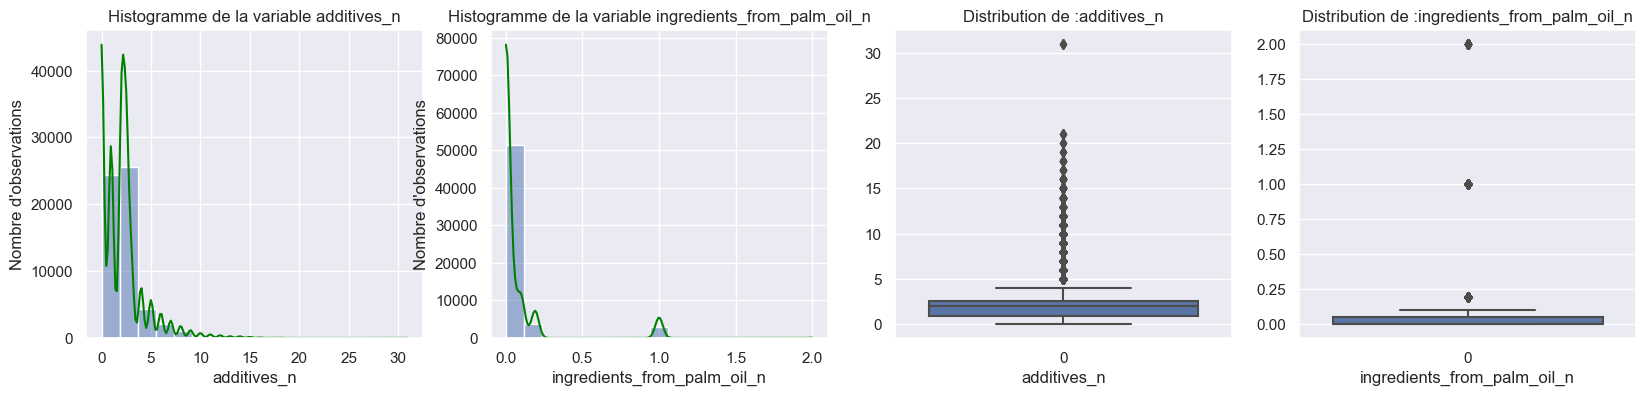

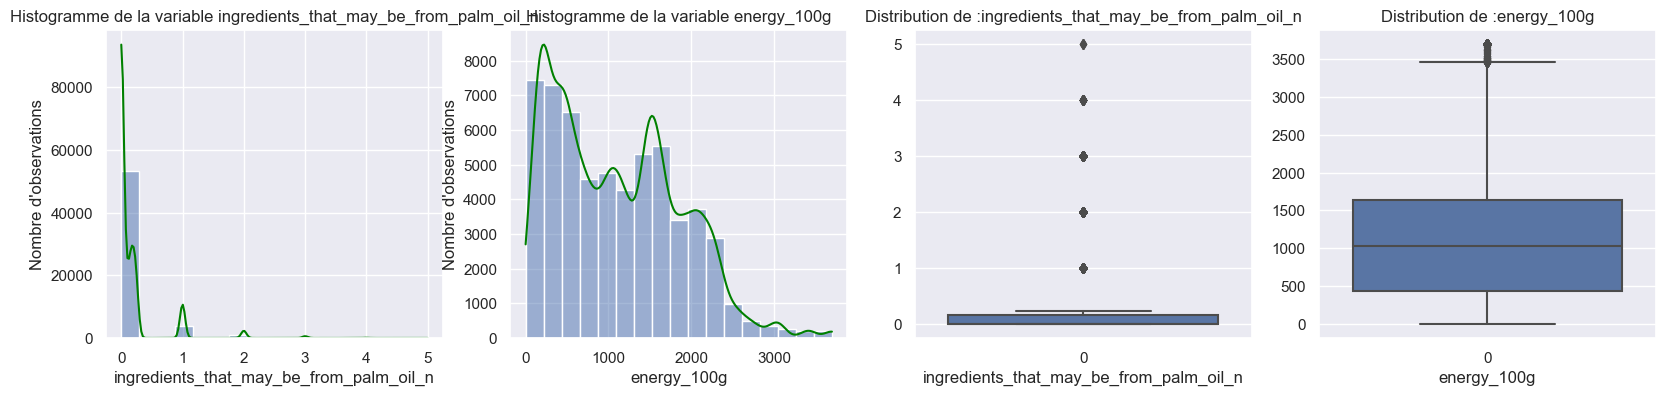

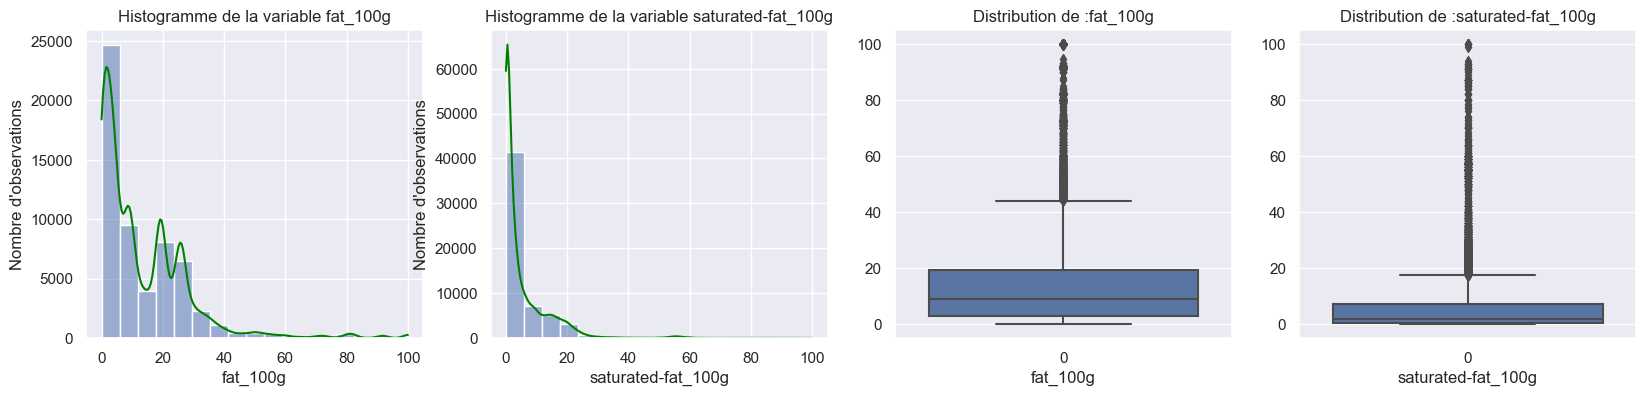

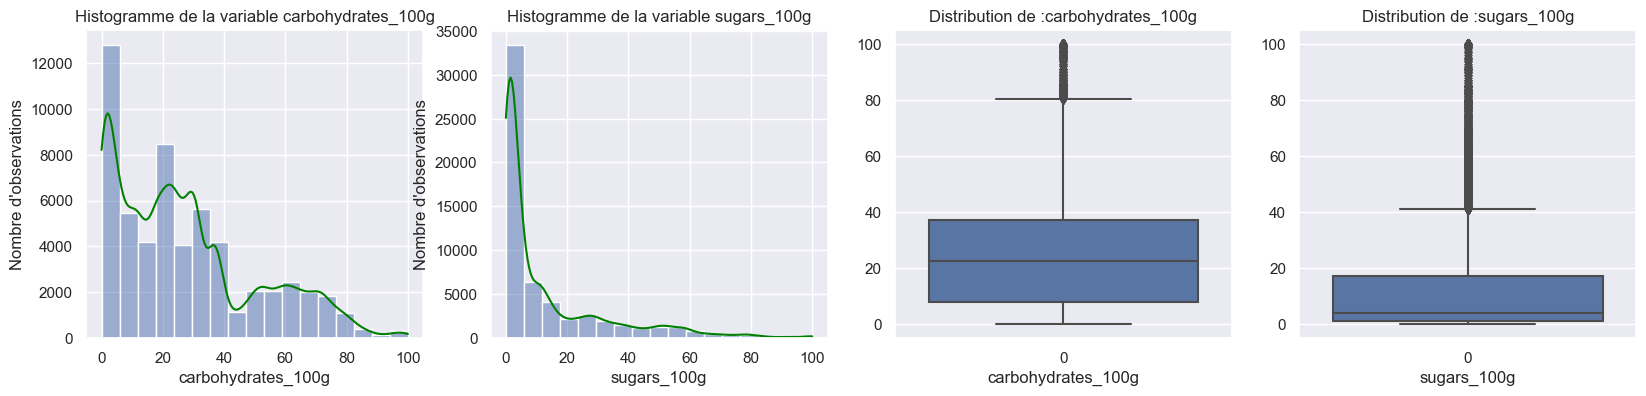

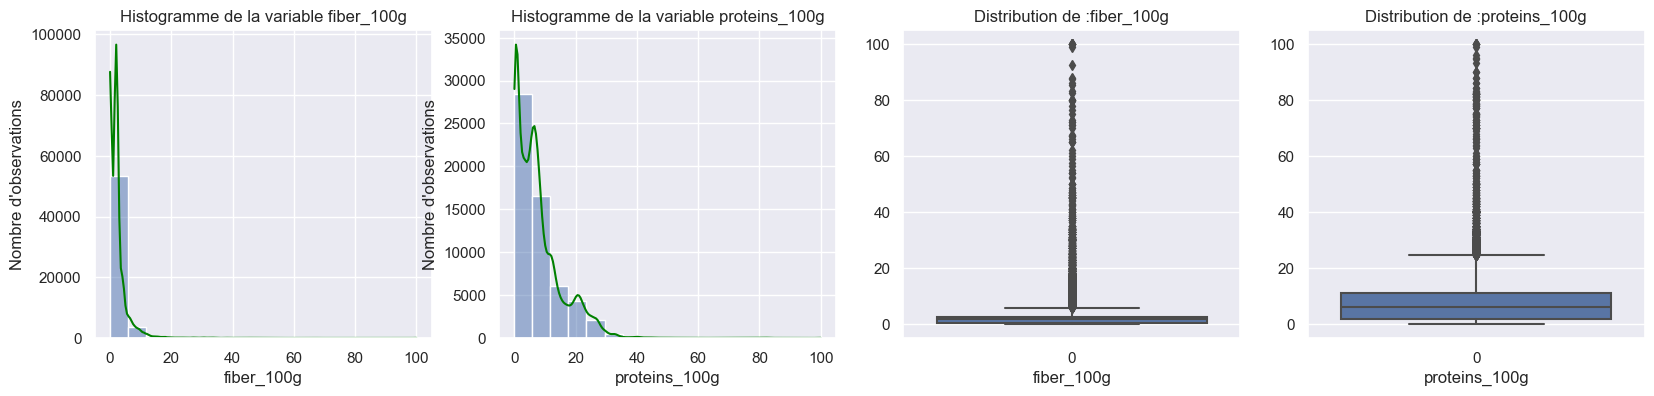

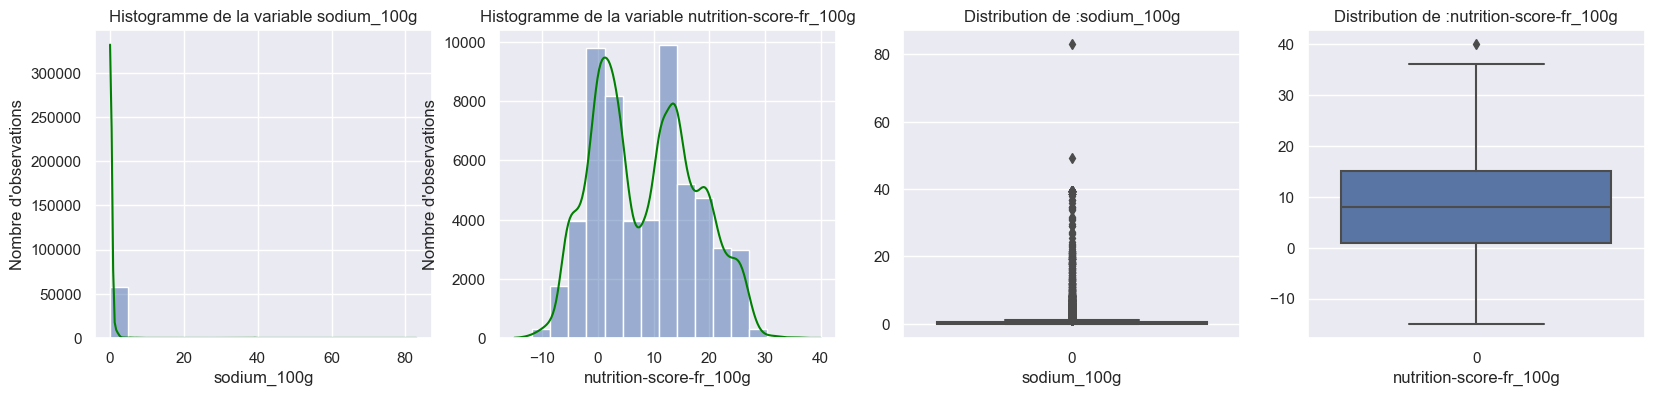

In [70]:
def plot_numeric_cols(df, numeric_cols):
    # Pour chaque colonne numérique dans la liste numeric_cols
    for j, col in enumerate(numeric_cols):
        # Si j est un nombre pair, créer une nouvelle figure avec 4 sous-graphiques
        if j % 2 == 0:
            fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
    
        # Créer un histogramme de la variable col et l'ajouter au premier sous-graphique
        sns.histplot(df[col], ax=axes[j%2], bins="sturges", kde=True)
        # Changer la couleur de la courbe de densité en vert
        axes[j%2].lines[0].set_color('green')
        # Ajouter le nom de la variable à l'axe des x
        axes[j%2].set_xlabel(col)
        # Ajouter le nom de l'axe des y
        axes[j%2].set_ylabel("Nombre d'observations")
        # Ajouter un titre pour l'histogramme
        axes[j%2].set_title('Histogramme de la variable ' + col)

        # Créer un boxplot de la variable col et l'ajouter au troisième sous-graphique
        sns.boxplot(df[col], ax=axes[j%2+2])
        # Ajouter le nom de la variable à l'axe des x
        axes[j%2+2].set_xlabel(col)
        # Ajouter un titre pour le boxplot
        axes[j%2+2].set_title('Distribution de :' + col)

    # Afficher tous les graphiques
    plt.show()
plot_numeric_cols(df, numeric_cols)

#### Répartition des Nutriscores

Le graphique ci dessous permet de visualiserla répartition des nutriscores dans le jeu de données, et peut aider à identifier les nutriscores les plus fréquents ou les plus rares. Cela peut être utile pour comprendre la qualité nutritionnelle globale des produits alimentaires dans le jeu de données, et pour identifier les produits à éviter ou à privilégier en fonction de leur nutriscore.

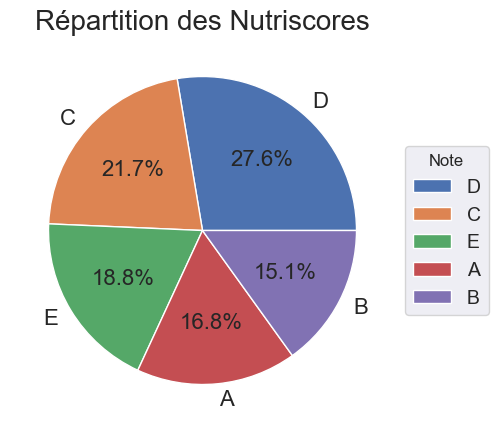

In [72]:
def plot_nutriscores(df):
    # Création d'une figure de taille 5x5 pouces
    plt.figure(figsize=(5,5))

    # Ajout du titre de la figure
    plt.title('Répartition des Nutriscores', size=20)

    # Création du pie chart en utilisant les valeurs de la variable "nutrition_grade_fr" dans le dataframe "df"
    # et en ajoutant les pourcentages d'occurrence de chaque valeur
    wedges, texts, autotexts = plt.pie(df.nutrition_grade_fr.value_counts().values, 
            labels = df.nutrition_grade_fr.value_counts().index.str.upper(),
           autopct='%1.1f%%', textprops={'fontsize': 16})

    # Récupération de l'objet "axe" de la figure
    ax = plt.gca()

    # Ajout de la légende pour le pie chart en utilisant les labels et les titres spécifiés
    ax.legend(wedges, df.nutrition_grade_fr.value_counts().index.str.upper(),
              title="Note",
              loc="center left",
              fontsize=14,
              bbox_to_anchor=(1, 0, 0.5, 1))

    # Affichage de la figure
    plt.show()
plot_nutriscores(df)

Bien que toutes les modalités ne soient pas également représentées, il est important de souligner que la représentativité globale reste significative. Nous n'observons pas de déséquilibre fort notable entre les modalités. Cependant, il est à noter que la modalité "d" est légèrement plus représentée (27%) que les autres modalités et que la modalité "b" est quant à elle moins représentée (15%).


## Analyse bivariée 

L'analyse bivariée est une méthode d'analyse statistique qui permet d'étudier la relation entre deux variables. Elle est utilisée pour explorer la corrélation, l'association ou la causalité entre deux variables en examinant comment elles varient ensemble. Les méthodes d'analyse bivariée comprennent la régression linéaire, l'analyse de corrélation,  et bien d'autres encore. Cette analyse peut aider à identifier des tendances, des schémas ou des relations cachées qui ne seraient pas visibles en examinant les variables individuellement.

#### Pairplot pour les données quantitatives

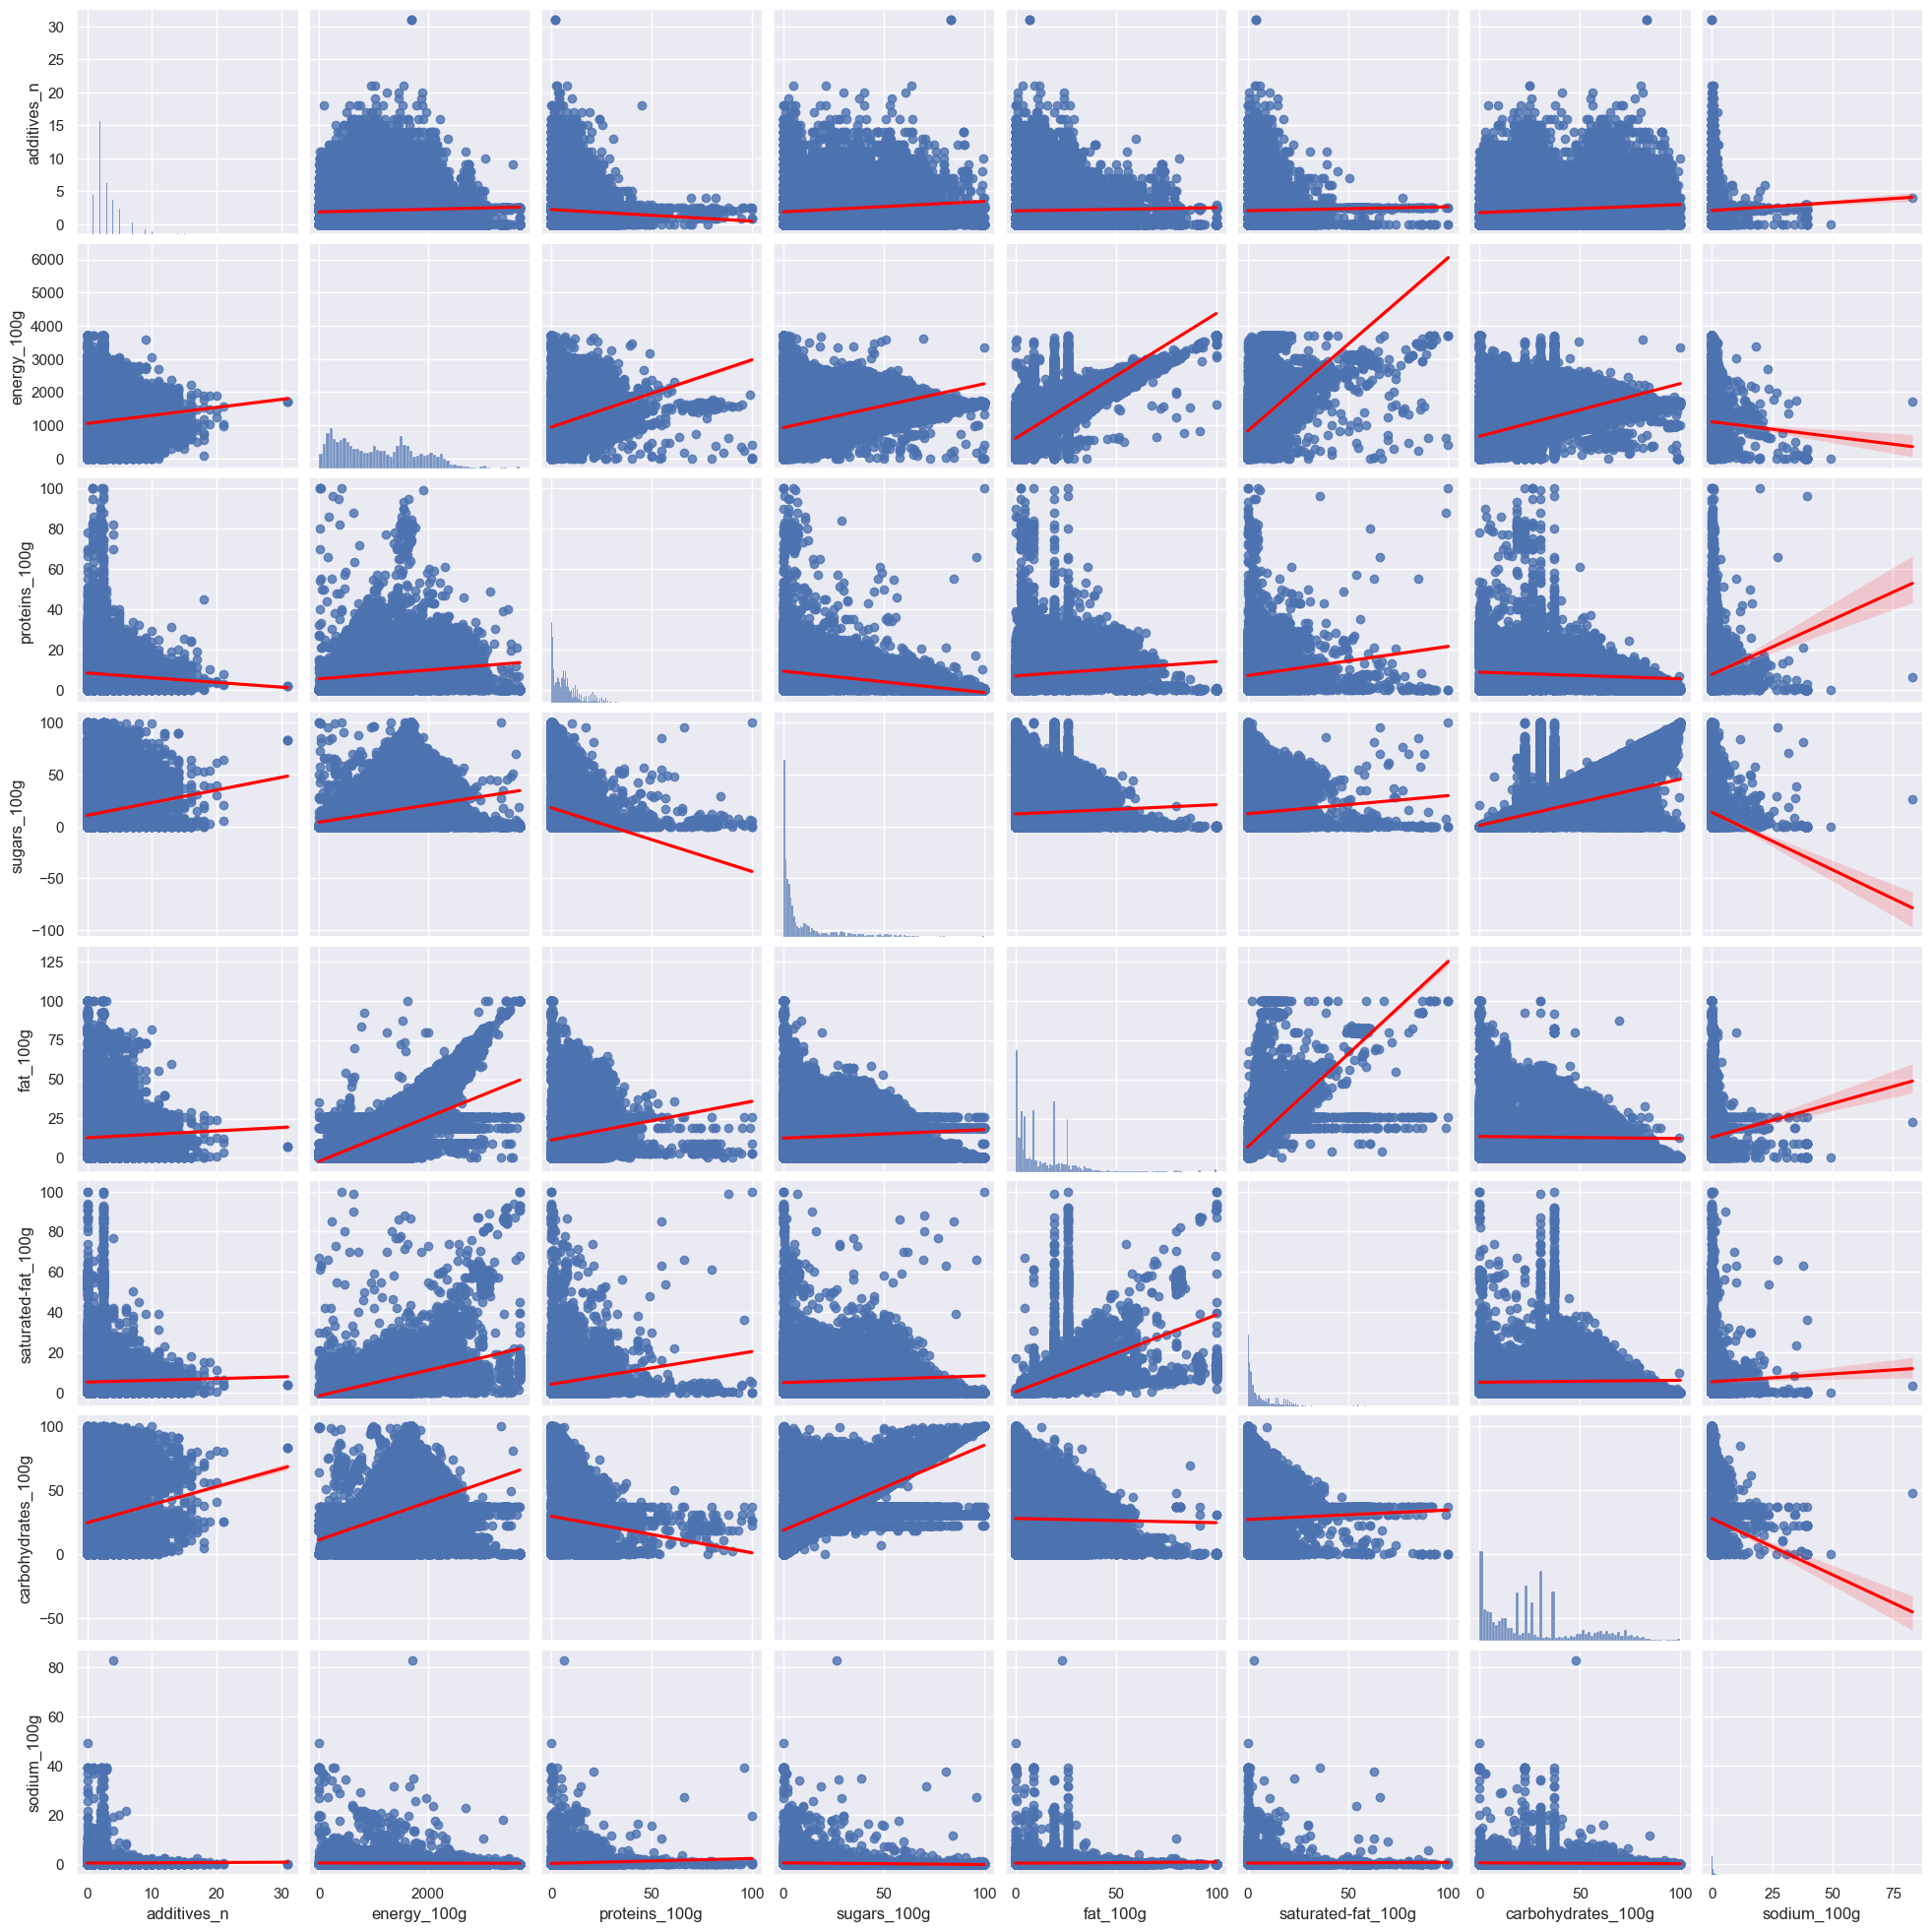

In [52]:
plot_cols =  ["additives_n", "energy_100g", "proteins_100g", "sugars_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sodium_100g", 'nutrition_grade_fr']
quant_data = df.loc[:,plot_cols]
sns.pairplot(data=quant_data, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

Des représentations graphiques pairplot ont été réalisées avec Seaborn sur les variables quantitatives dans le but de détecter des corrélations entre elles. En effet, si deux variables sont très corrélées, le nuage de points aura une déviation minimale par rapport à la droite d'ajustement. Cependant, aucun nuage de points n'a une forme similaire à une droite, ce qui signifie qu'aucune variable quantitative ne peut être considérée comme doublon d'une autre.

#### Distributions de nutriments par grade nutritionnel

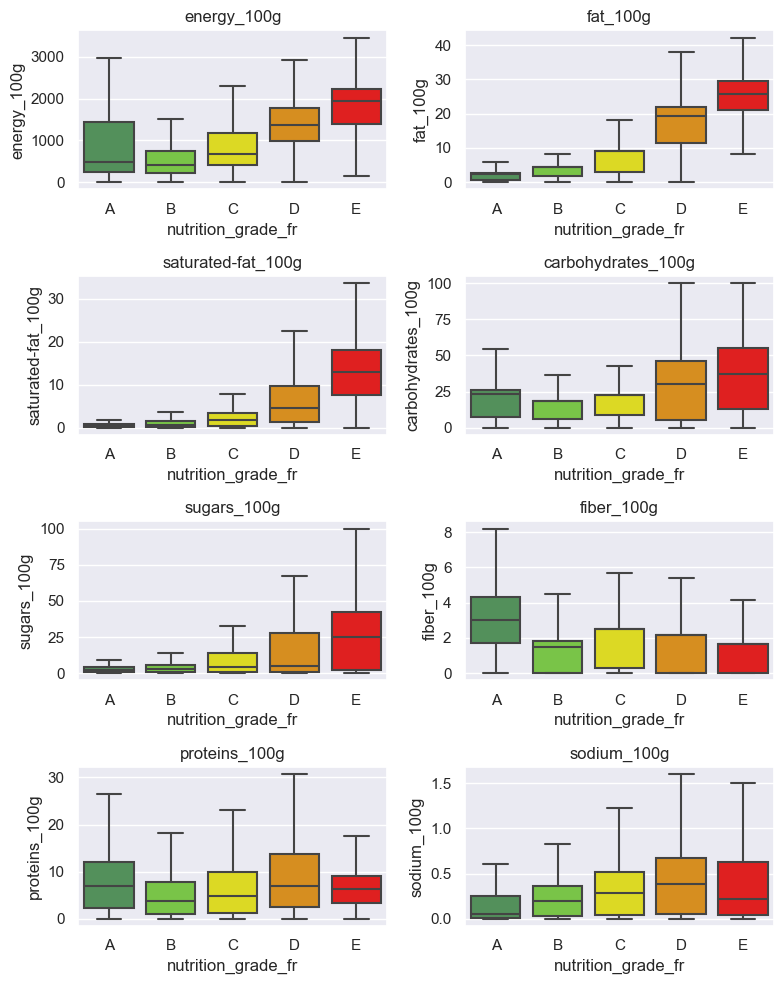

In [81]:
import numpy as np

def plot_macro_nutriments(df, macro_nutriments_labels):
    """
    Fonction qui crée des graphiques en boîte pour chaque macro-nutriment 
    en fonction du grade nutritionnel.
    Args:
    - df : DataFrame contenant les données à utiliser
    - macro_nutriments_labels : Liste des étiquettes de macro-nutriments à utiliser
    """

    # Sélection des colonnes contenant les données de macro-nutriments
    macro_nutriments_labels = []
    for col in df:
        if "_100g" in col:
            macro_nutriments_labels.append(col)

    # Création d'un dataframe contenant uniquement les colonnes de macro-nutriments 
    # et le grade nutritionnel, puis suppression des lignes avec des valeurs manquantes
    data_for_plot = df[macro_nutriments_labels + ["nutrition_grade_fr"]].dropna(subset=["nutrition_grade_fr"])

    # Explosion des colonnes de macro-nutriments en utilisant leurs étiquettes
    data_for_plot = data_for_plot.explode(macro_nutriments_labels)

    # Conversion des colonnes de macro-nutriments en float
    data_for_plot[macro_nutriments_labels] = data_for_plot[macro_nutriments_labels].astype('float')

    # Tri des grades nutritionnels uniques dans l'ordre alphabétique
    order = sorted(df["nutrition_grade_fr"].dropna().unique())

    # Création d'étiquettes pour les grades nutritionnels
    labels = ['A', 'B', 'C', 'D', 'E']
    
    # Création d'un tableau de position en y pour les graphiques
    y_pos = np.arange(len(labels))

    # Création d'une figure avec 4 lignes et 2 colonnes de graphiques
    fig, axs = plt.subplots(4, 2, figsize=(8, 10))

    # Boucle sur les étiquettes de macro-nutriments pour créer les graphiques
    for i, macro_nutri in enumerate(macro_nutriments_labels[:8]):

        # Création d'un graphique en boîte pour le macro-nutriment actuel 
        # en fonction du grade nutritionnel, en utilisant la palette de couleurs spécifiée
        # et en supprimant les points aberrants
        sns.boxplot(data=data_for_plot, x ='nutrition_grade_fr', y=macro_nutri,
                    order=order, showfliers=False,
                    palette={'a':"#499A53", 'b':"#74D834", 'c':"#FBF605", 'd':"#F49402", 'e':"#FF0000"},
                    ax=axs[i//2, i%2])

        # Ajout d'un titre au graphique
        axs[i//2, i%2].set_title(macro_nutri)

        # Ajout d'étiquettes pour les grades nutritionnels sur l'axe des x
        axs[i//2, i%2].set_xticklabels(labels)

    # Ajustement des espaces entre les graphiques pour les rendre plus lisibles
    plt.tight_layout()
plt.show()
plot_macro_nutriments(df, macro_nutriments_labels)

Les produits ayant une forte teneur en sucre, en graisses et en sel sont associés à un mauvais Nutri-Score, tandis que ceux riches en fibres ont moins de chances d'avoir une qualité nutritionnelle médiocre. Les graphiques obtenus confirment les principes de la méthode de calcul du Nutri-Score.

#### Matrice de corrélation

La matrice de corrélation est un outil statistique qui permet de visualiser les relations linéaires entre plusieurs variables. Elle présente les corrélations entre chaque paire de variables sous forme de tableau symétrique, où la diagonale principale contient les corrélations parfaites de chaque variable avec elle-même. Les valeurs de corrélation vont de -1 à 1, où -1 représente une corrélation négative parfaite, 0 représente une absence de corrélation et 1 représente une corrélation positive parfaite. La matrice de corrélation est un moyen utile d'identifier les variables qui sont fortement corrélées entre elles, ce qui peut aider à réduire la dimensionnalité des données et à identifier les variables les plus importantes pour la modélisation.

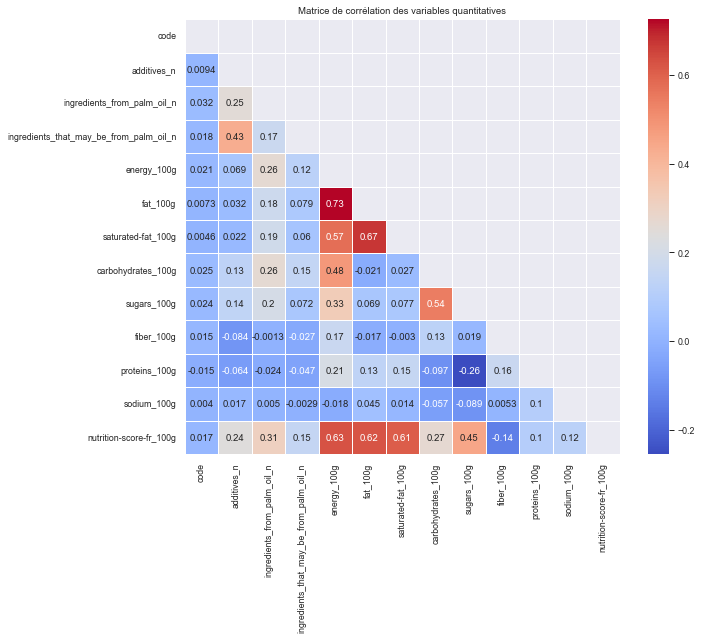

In [31]:
corr_matrix = df.corr()
mask = np.triu(corr_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
#plt.savefig("Présentation/Images/matrice_corr.png")
plt.show()

En examinant la matrice de corrélation, nous remarquons des corrélations linéaires positives fortes entre les variables fat_100g et energy_100g (73%) ainsi que fat_100g et saturated-fat_100g (69%). Nous observons également des corrélations positives du nutrition-score-fr_100g avec plusieurs variables de nutriments telles que saturated_fat_100g (61%), energy_100g (63%), fat_100g (64%), et sugars_100g (45%).

#### Réduction de dimensions par PCA

PCA (Principal Component Analysis) est une méthode statistique multivariée qui permet de réduire la dimensionnalité d'un ensemble de données tout en conservant le maximum d'informations possibles. Elle consiste à trouver les composantes principales qui expliquent la variance totale des données, en les combinant de manière linéaire pour former de nouvelles variables appelées composantes principales. Ces dernières sont ordonnées selon leur contribution à la variance totale, de sorte que la première composante principale explique la plus grande partie de la variance et ainsi de suite. L'objectif est de réduire la dimensionnalité de l'ensemble de données en conservant autant d'informations que possible, ce qui peut faciliter l'analyse et la visualisation des données.

,Component,Explained Variance
0,PC1,0.282101
1,PC2,0.152635
2,PC3,0.114382
3,PC4,0.098167
4,PC5,0.082419
5,PC6,0.066109
6,PC7,0.061408
7,PC8,0.049082
8,PC9,0.038119
9,PC10,0.030393


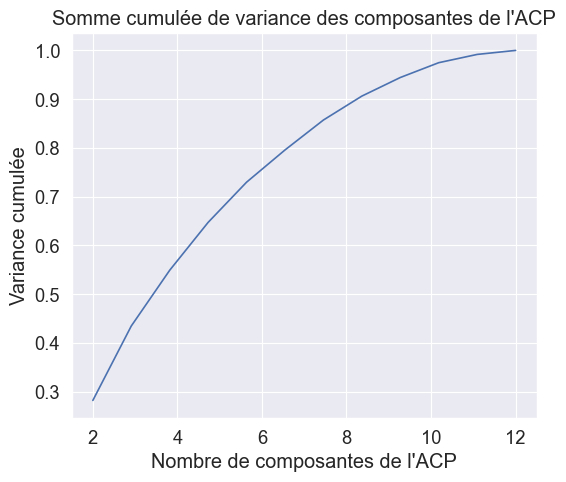

In [105]:

def pca_analysis(df):
    # Sélectionner les colonnes numériques
    data_pca = df.select_dtypes(['float64']).dropna()
    colonnes_pca = data_pca.columns
    
    # Centrer et réduire les données
    scaler = StandardScaler()
    data_pca = scaler.fit_transform(data_pca)
    
    # Analyse en composantes principales (PCA)
    pca = PCA(n_components = data_pca.shape[1])
    pca.fit(data_pca)
    explained_variances = pca.explained_variance_ratio_
    #colonnes_pca = data_pca.columns
    pca_compnenents = pd.DataFrame({'Component': [f"PC{i+1}" for i in range(len(explained_variances))], 
                         'Explained Variance': explained_variances})
    display(pca_compnenents)
    # Affichage de la somme cumulée de variance expliquée en fonction du nombre de composantes
    plt.figure(figsize=(6,5))
    plt.title('Somme cumulée de variance des composantes de l\'ACP')
    plt.xlabel('Nombre de composantes de l\'ACP')
    plt.ylabel('Variance cumulée')
    plt.plot(np.linspace(2, 12,12), np.cumsum(pca.explained_variance_ratio_))
    
    # Retourner les résultats
    return pca_compnenents, pca, explained_variances, data_pca, colonnes_pca
pca_compnenents, pca, explained_variances, data_pca, colonnes_pca = pca_analysis(df)

En observant la courbe de la variance cumulée en fonction du nombre de features, on peut constater qu'à partir de 11 dimensions, la variance cumulée dépasse les 95 %. Ainsi, si l'on souhaite optimiser le temps de calcul ou réduire le volume de données, il est possible de restreindre le jeu de données à ces 11 dimensions.

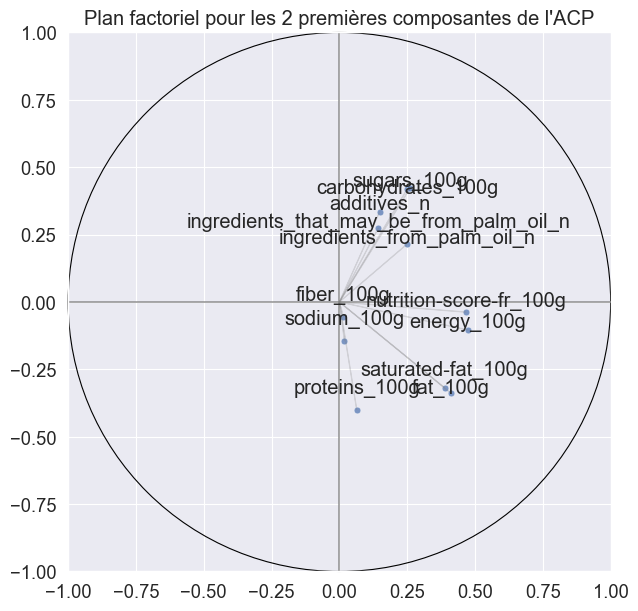

In [109]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(7,7))
plt.title("Plan factoriel pour les 2 premières composantes de l'ACP")
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
sns.scatterplot(x = pca.components_[0,:], y = pca.components_[1,:], alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

for x,y,colonne in zip(pca.components_[0,:],pca.components_[1,:], colonnes_pca):
    plt.annotate(colonne, (x,y), textcoords="offset points", xytext=(0,5+np.random.randint(-10,10)), ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)

sns.set_context("paper", font_scale=1)

## Modélisation

### Prédiction des valeurs manquantes du Nutriscore par régression linéaire

La régression linéaire est une technique de modélisation statistique qui permet de trouver une relation linéaire entre une variable dépendante (ou cible) et une ou plusieurs variables indépendantes (ou prédicteurs). Cette technique est utilisée pour prédire la valeur d'une variable continue en fonction de la valeur des variables indépendantes.

Le modèle de régression linéaire utilise une équation mathématique pour décrire la relation linéaire entre les variables. L'équation prend généralement la forme:

y = β0 + β1x1 + β2x2 + ... + βnxn + ε

où y est la variable dépendante, x1, x2, ..., xn sont les variables indépendantes, β0, β1, β2, ..., βn sont les coefficients de régression qui déterminent l'effet de chaque variable indépendante sur la variable dépendante, et ε est l'erreur résiduelle.

L'objectif de la régression linéaire est de trouver les valeurs des coefficients de régression qui minimisent la somme des carrés des erreurs résiduelles. Cette approche est connue sous le nom de méthode des moindres carrés.

Une fois que les coefficients de régression sont trouvés, le modèle peut être utilisé pour prédire la valeur de la variable dépendante pour de nouvelles valeurs des variables indépendantes.

La régression linéaire est une technique simple mais puissante de modélisation statistique qui est largement utilisée dans de nombreux domaines, notamment la finance, l'économie, la biologie et l'ingénierie.






In [110]:
def prepare_data_for_regression(df):
    """
    Prend un dataframe en entrée et retourne un nouveau dataframe prêt pour la régression linéaire.
    Le dataframe retourné contient les colonnes numériques sans valeurs manquantes, à l'exception de certaines colonnes spécifiques.
    """
    # Sélectionner les colonnes numériques avec valeurs non manquantes
    data_reg = df[df['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64'])

    # Supprimer certaines colonnes spécifiques et les valeurs manquantes restantes
    data_reg = data_reg.drop(['additives_n','energy_100g','ingredients_that_may_be_from_palm_oil_n','ingredients_from_palm_oil_n'], axis=1).dropna(axis=0)

    return data_reg
data_reg = prepare_data_for_regression(df)

In [112]:
data_reg.head()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
0,19.2609,0.8,30.349583,87.7,0.900000,0.6,0.003937,14.0
1,19.2609,2.9,30.349583,50.3,3.900000,9.5,0.001181,14.0
2,0.0000,0.0,10.400000,10.4,0.000000,0.0,0.010000,13.0
3,19.2609,11.0,30.349583,1.0,1.400000,7.5,0.314961,15.0
4,0.0000,0.0,10.400000,10.4,1.668452,0.0,0.039370,13.0


In [151]:
def linear_regression_model(dataframe, target_col, test_size=0.3, random_state=0):
    dataframe = dataframe.select_dtypes(['float64']).dropna()

    # Séparer les caractéristiques et la variable cible
    X = dataframe.drop(target_col, axis=1)
    y = dataframe[target_col]

    # Initialiser les variables pour stocker les prévisions
    y_pred_train = []
    y_pred_test = []

    # Séparer les données en un ensemble d'entraînement et un ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Créer un modèle de régression linéaire
    model = LinearRegression()

    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)

    # Prédire les valeurs de l'ensemble d'entraînement et de test
    #y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculer le coefficient de détermination (R2) pour l'ensemble d'entraînement et de test
    #R2_train = r2_score(y_train, y_pred_train)
    R2_test = r2_score(y_test, y_pred_test)
    print(R2_test)

    # Obtenir les coefficients et l'ordonnée à l'origine du modèle de régression linéaire
    coef = model.coef_
    intercept = model.intercept_

    # Créer un DataFrame pour stocker les résultats
    resultat = pd.DataFrame({
                              'y_test': y_test, 'y_pred_test': y_pred_test})
    display(resultat)

    return  R2_test, coef, intercept, resultat

R2_test, coef, intercept, resultat = linear_regression_model(data_reg, 'nutrition-score-fr_100g')


0.6634526551117532


,y_test,y_pred_test
48715,2.0,1.920722
18773,0.0,2.002843
4665,4.0,3.052061
39355,11.0,5.310163
9155,13.0,6.656406
...,...,...
12551,1.0,3.027875
49182,6.0,7.007250
11339,-3.0,1.119044
46822,3.0,5.962976
